
# EXPLORATORY DATA ANALYSIS ON SUCIDES IN INDIA FROM 2001-2012

In [ ]:
This Project Aims To Identify What Are The Major Cause For Sucide And Provides Insights To Help People Avoid Committing Sucide

# Import Libraries and Read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('C:/Users/h/Downloads/Suicides in India 2001-2012.csv')
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


# Explore Dataset and Insights:

In [8]:
df.shape

(237519, 7)

There are a total of 237519 samples (rows) and 7 columns in the dataframe.

In [5]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

No Null values in the dataset.

In [6]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [7]:
df['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

# Which States has the highest and the lowest suicide rate?

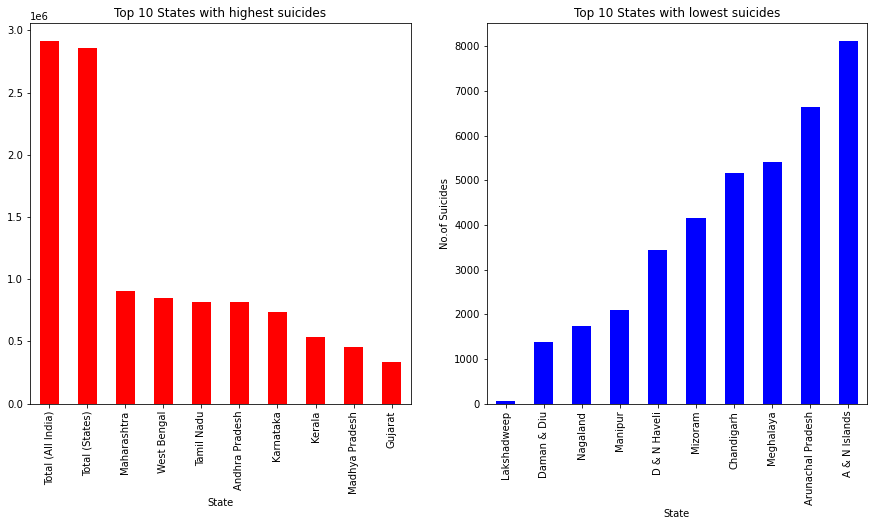

In [5]:
f, ax = plt.subplots(1,2, figsize = (15,7))
df.groupby("State")["Total"].sum().sort_values(ascending = False)[:10].plot(kind = "bar", color = "red", ax= ax[0])                                                                           
plt.ylabel("No.of Suicides")
df.groupby("State")["Total"].sum().sort_values(ascending = True)[:10].plot(kind = "bar",  color = "blue", ax= ax[1])
plt.ylabel("No.of Suicides")                                                                          
ax[0].title.set_text('Top 10 States with highest suicides')
ax[1].title.set_text('Top 10 States with lowest suicides')

Observations:

Maharashtra, West Bengal & Tamil Nadu are the states with highest suicide rates.
Nagaland, Manipur & Mizoram are the states with lowest suicide rates.
Union Territories has the lowest suicide rates (Lakshadweep, Daman & Diu).

<AxesSubplot:xlabel='State', ylabel='Total'>

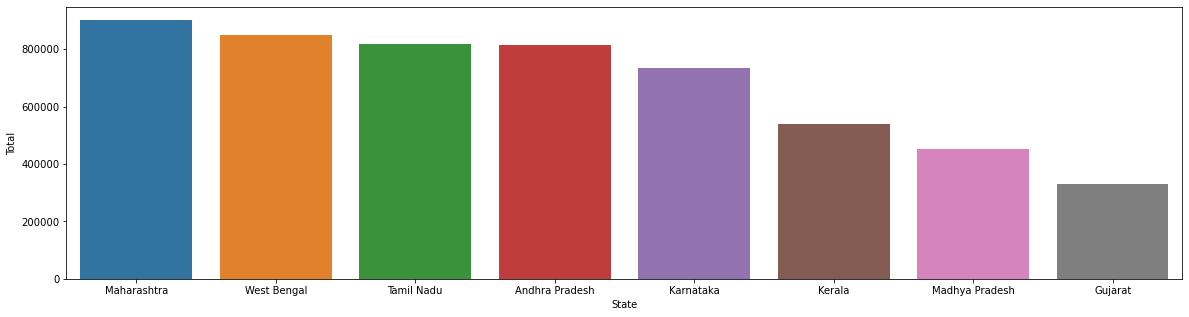

In [18]:
plt.figure(figsize=(20,5))
a=df.groupby('State')['Total'].sum().sort_values(ascending=False)[2:10]
sns.barplot(x=a.index,y=a)

                           These are the top States where most of the sucide takes place. Maharashtra tops

<BarContainer object of 8 artists>

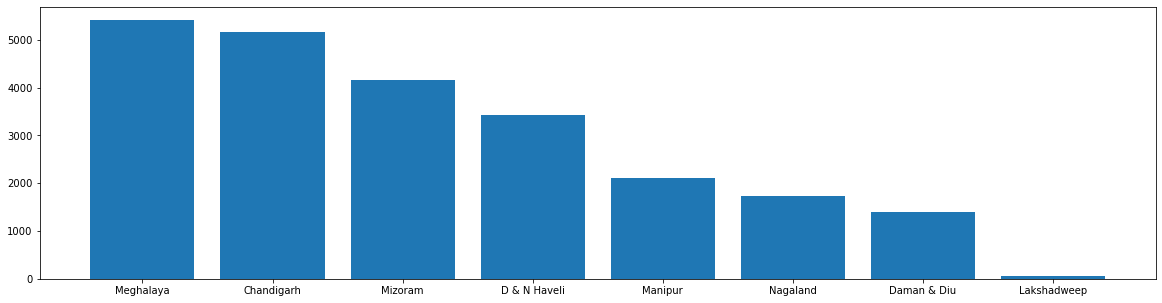

In [22]:
lst=pd.DataFrame(df.groupby('State')['Total'].sum().sort_values(ascending=False))
lst=lst.iloc[30:]
plt.figure(figsize=(20,5))
plt.bar(lst.index,lst['Total'],)

                             Above graph state that East Indian States have less sucide count

In [10]:
df[(df['Type']=='Love Affairs') | (df['Type']=='Suspected/Illicit Relation') | (df['Type']=='Illegitimate Pregnancy')]['Total'].sum()

62444

<AxesSubplot:xlabel='Type', ylabel='Total'>

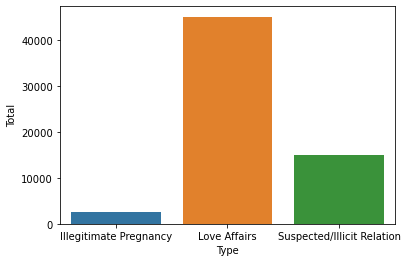

In [11]:
aa=df[(df['Type']=='Love Affairs') | (df['Type']=='Suspected/Illicit Relation') | (df['Type']=='Illegitimate Pregnancy')]
mm=aa[aa['Total']>0]
ss=pd.DataFrame(mm.groupby('Type')['Total'].sum())
sns.barplot(x=ss.index,y=ss['Total'],data=ss)

                     Due to illegical relationship intotal 62444 commit sucide. Among them people who are having Love Affairs                        commit most of the sucide.

<AxesSubplot:xlabel='Gender', ylabel='Total'>

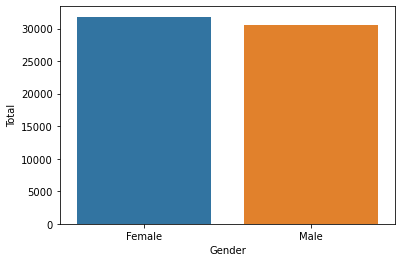

In [12]:
ss=pd.DataFrame(mm.groupby('Gender')['Total'].sum())
sns.barplot(x=ss.index,y=ss['Total'],data=ss)

                                      Female Commit more sucide than Male. 

<AxesSubplot:xlabel='Year', ylabel='Total'>

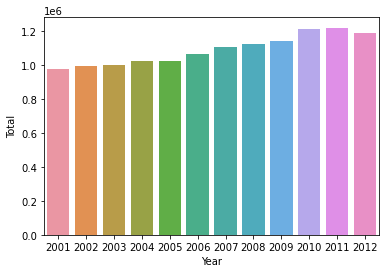

In [9]:
jj=df[df['Total']>0]
bb=pd.DataFrame(jj.groupby('Year')['Total'].sum().sort_values(ascending=False))
sns.barplot(x=bb.index,y=bb['Total'],data=bb)

        I can say that in 2011 most sucide takes place and in 2001 least sucide takes place during the 2001-2012 era.

(0.0, 18.0)

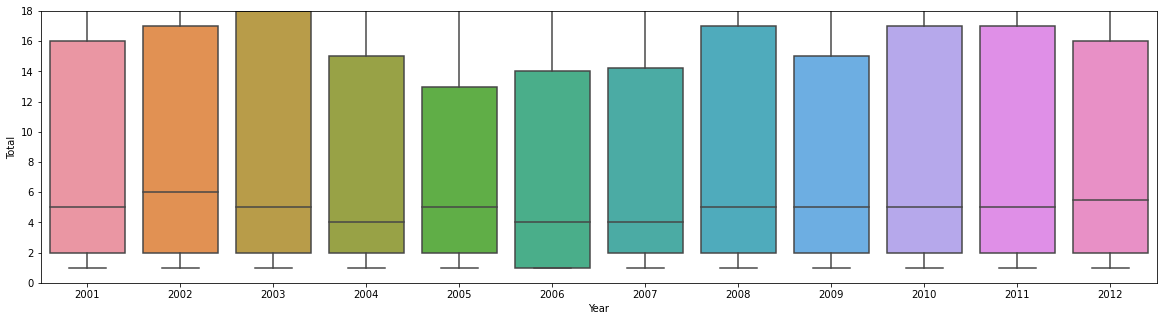

In [14]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Year',y=mm['Total'],data=mm)
plt.ylim(0,18)

<AxesSubplot:xlabel='Type', ylabel='Total'>

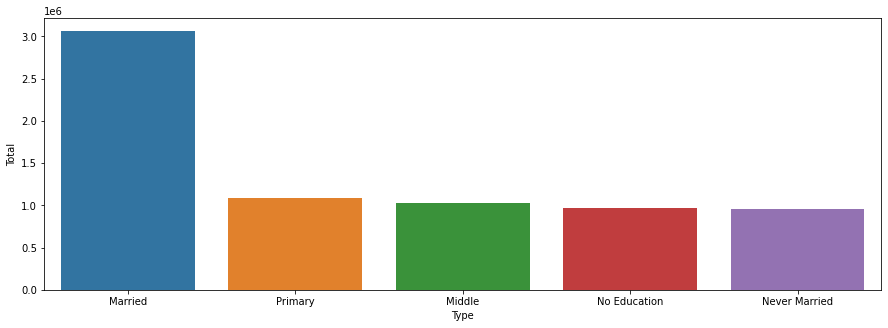

In [15]:
nn=pd.DataFrame(jj.groupby('Type')['Total'].sum().sort_values(ascending=False)[0:5])
plt.figure(figsize=(15,5))
sns.barplot(x=nn.index,y=nn['Total'],data=nn)

             Married People commit more Sucide. People who commit sucide are usually from Middle Class family or Illetrate.

Text(0.5, 0, 'Type of Sucide')

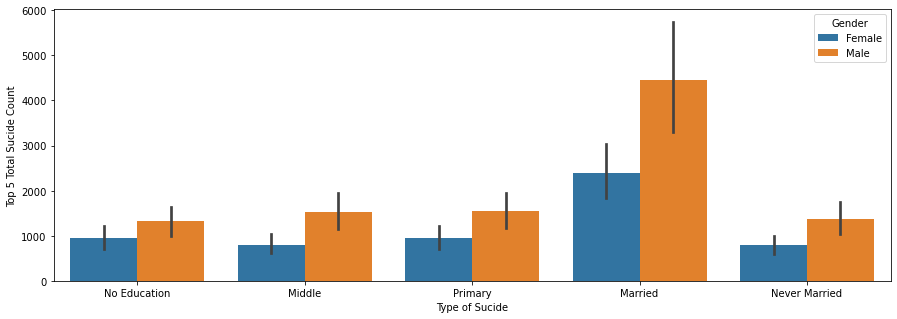

In [16]:
jj.head()
ss=jj[['Type','Gender','Total']]
ss.head()
plt.figure(figsize=(15,5))
sns.barplot(x='Type',y='Total',data=ss[(ss['Type']=='Married') | (ss['Type']=='Primary') | (ss['Type']=='Middle')| (ss['Type']=='No Education') | (ss['Type']=='Never Married')],hue='Gender')
plt.ylabel('Top 5 Total Sucide Count')
plt.xlabel('Type of Sucide')

In [10]:
female=jj[jj['Gender']=='Female']
male=jj[jj['Gender']=='Male']
female.groupby('Type')['Total'].sum().sort_values(ascending=False)[0:10]

Type
Married                                     1070301
Primary                                      409020
No Education                                 398826
Middle                                       353289
Never Married                                346380
House Wife                                   285243
Matriculate/Secondary                        245820
By Hanging                                   148423
Family Problems                              133181
Hr. Secondary/Intermediate/Pre-Universit     118218
Name: Total, dtype: int64

In [18]:
male.groupby('Type')['Total'].sum().sort_values(ascending=False)[0:10]

Type
Married                                     1995021
Primary                                      679461
Middle                                       675624
Never Married                                608523
No Education                                 566445
Matriculate/Secondary                        523878
Others (Please Specify)                      357956
By Hanging                                   312532
Hr. Secondary/Intermediate/Pre-Universit     238506
Family Problems                              208771
Name: Total, dtype: int64

                      Both Males and Females usually commit sucide by Hanging.

# Who commits more sucide in love affair?

Text(0, 0.5, 'Sucide Count Due to Love Affair')

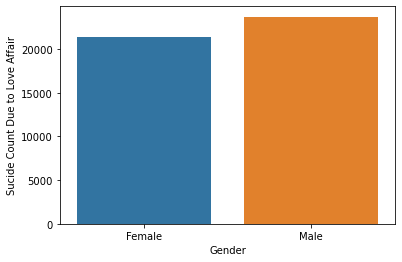

In [19]:
cc=pd.DataFrame(jj[jj['Type']=='Love Affairs'].groupby('Gender')['Total'].sum())
sns.barplot(x=cc.index,y=cc['Total'],data=cc)
plt.ylabel('Sucide Count Due to Love Affair')

                          Males are more prone to commit sucide than Female due to Love affair.

In [20]:
stu=jj[jj['Type_code']=='Education_Status']
tot=jj['Total'].sum()  
per=(stu['Total'].sum()/tot)*100
per

33.41402907984511

              33.41% of the Total Commited sucide are Students from school,college or university. 
                          Youth of India is really strugling for life

Text(0.5, 1.0, 'Increment in sucide of students by year')

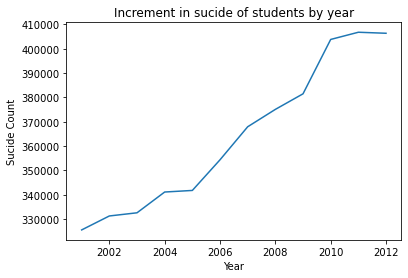

In [21]:
gra=stu.groupby('Year')['Total'].sum()
plt.plot(gra.index,gra.values)
plt.xlabel('Year')
plt.ylabel('Sucide Count')
plt.title('Increment in sucide of students by year')

                 The above graph state that as the time is passing or with advancement in year,
                       its getting more difficult for student to sustain in competition 
                       as from 2002 to 2012 the Sucide count got incremented by 1lakh. 
    As we are advancing in time, education is becoming burden for student as it's destroying their life.

In [32]:
##Removing the values from the column 'State' and making new dataframe,df
statewise_df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)
len(df[df['Total'] == 0])

135481

In [39]:
statewise_df = statewise_df.drop(statewise_df[statewise_df.Total == 0].index)

# Statewise Number Of Suicides
Here we will see which state has highest number of suicide and also visualize this data on a graph

Total number of suicides in each State :  State
A & N Islands          8109
Andhra Pradesh       814059
Arunachal Pradesh      6633
Assam                172276
Bihar                 46214
Chandigarh             5164
Chhattisgarh         302354
D & N Haveli           3430
Daman & Diu            1391
Delhi (Ut)            84272
Goa                   17363
Gujarat              330858
Haryana              147176
Himachal Pradesh      26562
Jammu & Kashmir       14821
Jharkhand             49720
Karnataka            734825
Kerala               538946
Lakshadweep              50
Madhya Pradesh       451535
Maharashtra          901945
Manipur                2102
Meghalaya              5415
Mizoram                4154
Nagaland               1728
Odisha               267234
Puducherry            32144
Punjab                46350
Rajasthan            255134
Sikkim                 9606
Tamil Nadu           818691
Tripura               45965
Uttar Pradesh        233352
Uttarakhand           18496


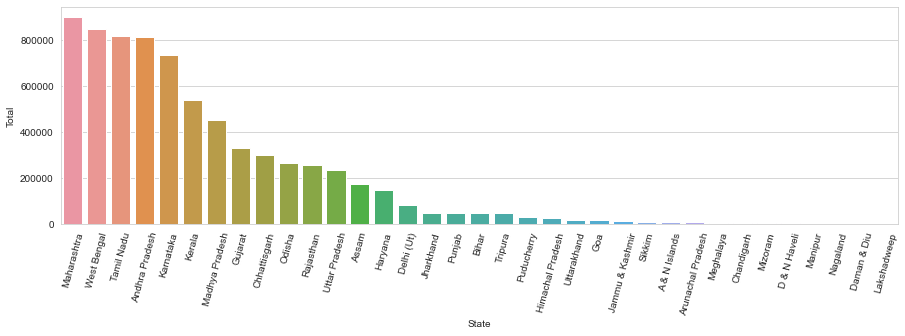

In [42]:
#Creating a series of total suicides on the basis of states

statewise_total_suicide = statewise_df.groupby("State")["Total"].sum()
print('Total number of suicides in each State : ', statewise_total_suicide)
#plotting the above data

filter_state = pd.DataFrame(statewise_total_suicide.reset_index())
sort_state = filter_state.sort_values('Total',ascending = False)
f, ax = plt.subplots(figsize=(15, 4))
sns.barplot(y = 'Total', x = 'State',data = sort_state, edgecolor = 'w')
plt.xticks(rotation=75);
plt.show()

# Suicides According To The Causes In Each Year
In this section we will see the causes of the suicides and the number of the suicides due to these causes in year

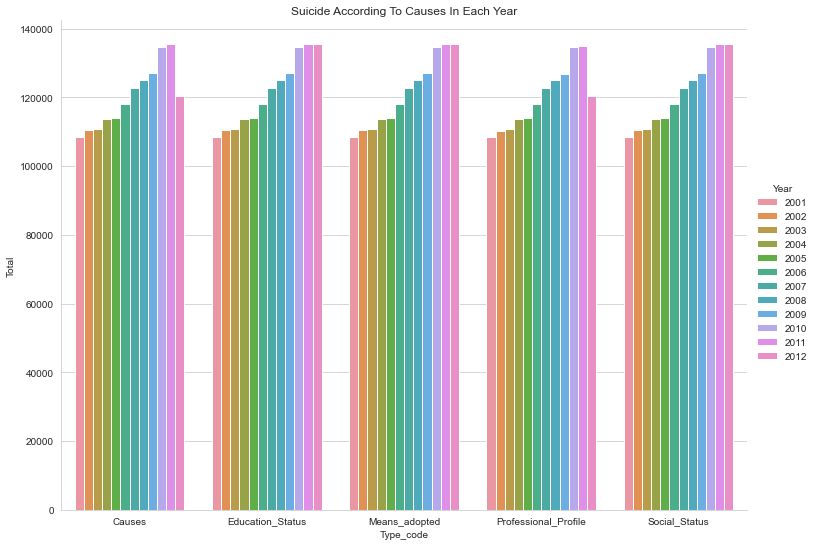

In [43]:
#Filtering the data according to 'type_code','Total' and 'Year'
filter_type_code = pd.DataFrame(statewise_df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()

#Plotting the above data
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=7.5, aspect=11.7/8.27);
plt.title('Suicide According To Causes In Each Year');

# Suicide According To Gender
In this section we will visualize the total nuber of suicides on the basis of the gender of the indvidual

Female    46269
Male      54841
Name: Gender, dtype: int64


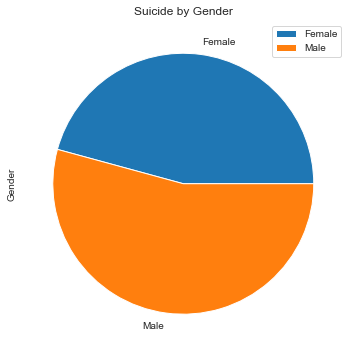

In [44]:
#Gender Suicide Frequency
counts = statewise_df['Gender'].value_counts().sort_index()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

# Suicides By The Eduatonal Background
In this section we will see individuals of which educational background have committed suicides more often.

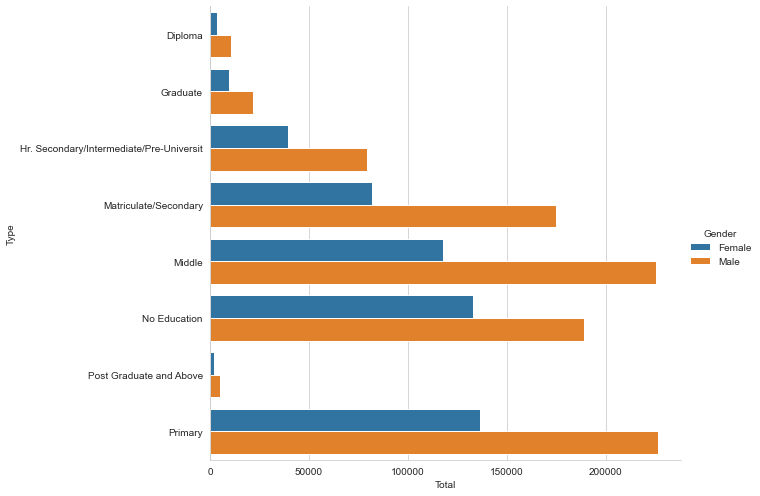

In [45]:
#filtering the data as per the educational background
education_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
education_status

#plotting the above data
g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/8.27);
sns.set_style('whitegrid');

In [ ]:
As per above graph it seems that people that has no formal or any professional education have committed more suicides
especially the males.
Females of these education background have also committed suicides more often.

# Suicides By Social Status
In this section we will visualize the suicides according to the social status of the individauls.

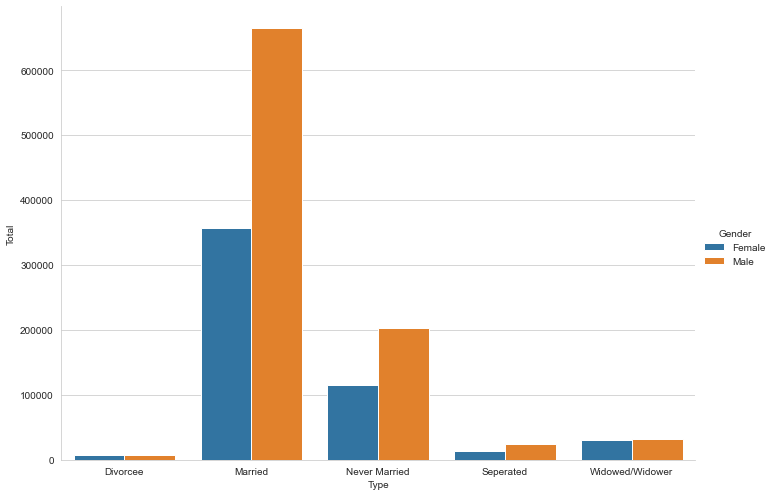

In [46]:
#filtering data according to the social status
filter_social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()

#plotting the above data
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/8.27);

In [ ]:
From above visualization we can deduce that people both male and female who are married have commited suicides more often
than anyother
social status. Let's us check the suicide rate according to the age group to make the picture more clear.

# Suicides By Age Groups
As we have seen in above section that married people have commited more suicides. Now we will try to check this inference through age group column. If the above inference is right then the age group that has committed suicides will fall in between 25 to 50.

0-14      9639
15-29    24960
30-44    24064
45-59    19730
60+      13766
Name: Age_group, dtype: int64


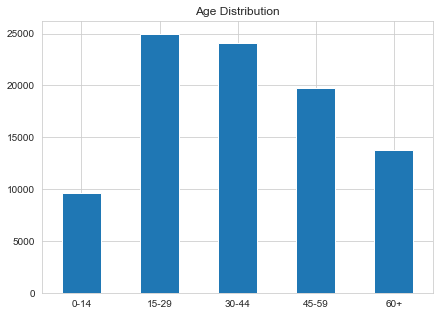

In [47]:
#Age Distributiion
statewise_Age_df = statewise_df.drop(statewise_df[statewise_df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()

# Which state has the most number of suicides?

In [48]:
statewise_total_suicide = statewise_df.groupby("State")["Total"].sum()
max = statewise_total_suicide.idxmax()

print("The state which has most number of suicides:", max)

The state which has most number of suicides: Maharashtra


# Which age group individuals tend to commit suicide more often?

In [49]:
counts = statewise_Age_df['Age_group'].value_counts().sort_index()
max = counts.idxmax()

print("Age group of people who tend to commit suicide more often:", max)

Age group of people who tend to commit suicide more often: 15-29


# Which year has the most number of suicides?

In [50]:
yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()
max = yearwise_total_suicide.idxmax()

print('Year with the most number of suicides:', max)

Year with the most number of suicides: 2011


# Inferences and Conclusion
According to the above analysis we can conclude the following things:

Males tend to commit more suicides compared to Females in India
Highest no. of suicide cases occur in Maharashtra, West Bengal, and Tamil Nadu.
If the trend continues the number of suicides will increase in the future



People who commit suicide are mostly:
Married
Farmers and housewives
Youngsters (15-29 age) and middle aged (30-44)
Don't have proper or any professional education

# Future Work
The dataset for suicides in India only consisted of 2001–2012 only.
Only 12 years are considered in this project for the analysis. 
For data related to after 2012 is still missing 
if somehow we can collect all data we definitely find the common reasons for suicides and will try to stop also.